## analyses on betacorona dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_table("../src/betacorona_ncbiCovid.csv", sep=",", index_col=0)
df['Country'] = df.Geo_Location.apply(lambda s: s.split(':')[0] if isinstance(s, str) else s )

df

,Accession,Fasta,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,Segment,Authors,Publications,Geo_Location,Host,Isolation_Source,Collection_Date,BioSample,GenBank_Title
0,AY572038,CTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACC...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29683,GenBank,complete,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,"SARS coronavirus civet020, complete genome"
1,AY572036,ATGTTTATTTTCTTATTATTTCTTACTCTCACTAGTGGTAGTGACC...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,3768,GenBank,partial,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,SARS coronavirus civet014 spike glycoprotein g...
2,AY572035,TGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCG...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29518,GenBank,complete,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,"SARS coronavirus civet010, complete genome"
3,AY572034,AAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGAAC...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,29540,GenBank,complete,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,"SARS coronavirus civet007, complete genome"
4,AY572037,ATGTTTATTTTCTTATTATTTCTTACTCTCACTAGTGGTAGTGACC...,2005-08-23T00:00:00Z,Severe acute respiratory syndrome-related coro...,Betacoronavirus,Coronaviridae,3768,GenBank,partial,NaN,NaN,"Wang,M., Yan,M., Xu,H., Liang,W., Kan,B., Zhen...",16485471,China: Southern China,Viverridae,feces,NaN,NaN,SARS coronavirus civet019 spike glycoprotein g...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8192,X04997,TAGTTCTAAACCTCATCTTAATTCTGGCCGTCCATACACACTTAGG...,1987-09-19T00:00:00Z,Murine coronavirus,Betacoronavirus,Coronaviridae,672,GenBank,partial,NaN,NaN,"Siddell,S.G., Skinner,M.A., Ebner,D.",3838338,NaN,NaN,NaN,NaN,NaN,Coronavirus MHV-JHM mRNA 5 5'-proximal region
8193,X04998,AGAAAATCTAAACAATTTATAGCATTTTAGTTGCTACTTTGCTCCT...,1987-06-07T00:00:00Z,Murine coronavirus,Betacoronavirus,Coronaviridae,487,GenBank,partial,NaN,NaN,"Skinner,M.A., Siddell,S.G.",3973564,NaN,NaN,NaN,NaN,NaN,Mouse hepatitis virus JHM MRNA 4 coding sequence
8194,X04223,TGGCGTCCGTACGTACCCTCTCTACTCTAAAACTCTTGTAGTTTAA...,1987-03-09T00:00:00Z,Murine coronavirus,Betacoronavirus,Coronaviridae,780,GenBank,partial,NaN,NaN,"Pfleiderer,M., Skinner,M.A., Siddell,S.G.",3748812,NaN,NaN,NaN,NaN,NaN,Coronavirus MHV-JHM mRNA for membrane protein ...
8195,X00990,TATAAGAGTGATTGGCGTCCGTACGTACCCTCTCTACTCTAAAACT...,1985-06-13T00:00:00Z,Murine coronavirus,Betacoronavirus,Coronaviridae,1767,GenBank,partial,NaN,NaN,"Skinner,M.A., Siddell,S.G.",6308569,NaN,NaN,NaN,NaN,NaN,Mouse Hepatitis Virus JHM mRNA7 for nucleocaps...


In [21]:
# Dataset exploration

df[df.Length > 25000].Geo_Location.unique()

array(['China: Southern China', 'USA', 'China', 'USA: Ohio', nan, 'Kenya',
       'Viet Nam', 'Italy', "Cote d'Ivoire", 'South Africa',
       'USA: Philadelphia', 'USA: Nashville, TN', 'Australia:Melbourne',
       'USA: Pennsylvania', 'Qatar', 'South Korea: Chungnam',
       'United Kingdom', 'USA: GA', 'USA: OR', 'USA: FL', 'Israel',
       'USA: WA', 'USA: RI', 'USA: CA', 'USA: TX', 'Pakistan: KPK',
       'Peru', 'USA: San Francisco, CA', 'Spain: Valencia',
       'Colombia: Antioquia', 'China: Hubei, Wuhan', 'Japan',
       'China: Zhejiang, Hangzhou', 'Pakistan: Gilgit',
       'Viet Nam: Ho Chi Minh city', 'USA: CA, San Diego County',
       'Taiwan', 'USA: MN', 'China: Shanghai', 'India: Kerala State',
       'USA: Snohomish County, WA', 'China: Beijing', 'Brazil',
       'China: Guangzhou', 'China: Guangdong, Guangzhou', 'Sweden',
       'Nepal', 'China: Yunnan', 'USA: IL', 'South Korea', 'USA: WI',
       'China: Hangzhou', 'USA: MA', 'Finland', 'China:Wuhan',
       'Austra

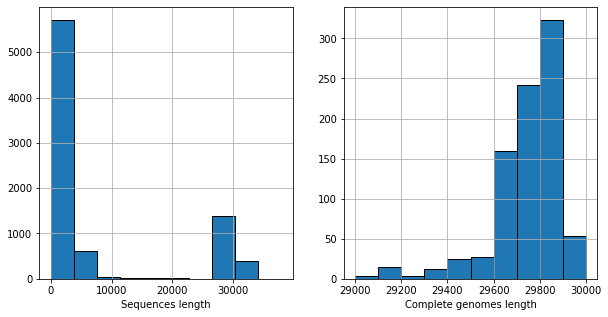

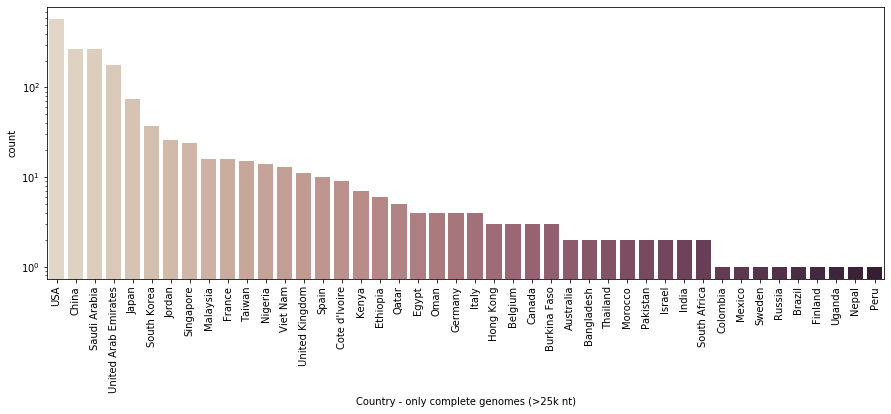

<Figure size 432x288 with 0 Axes>

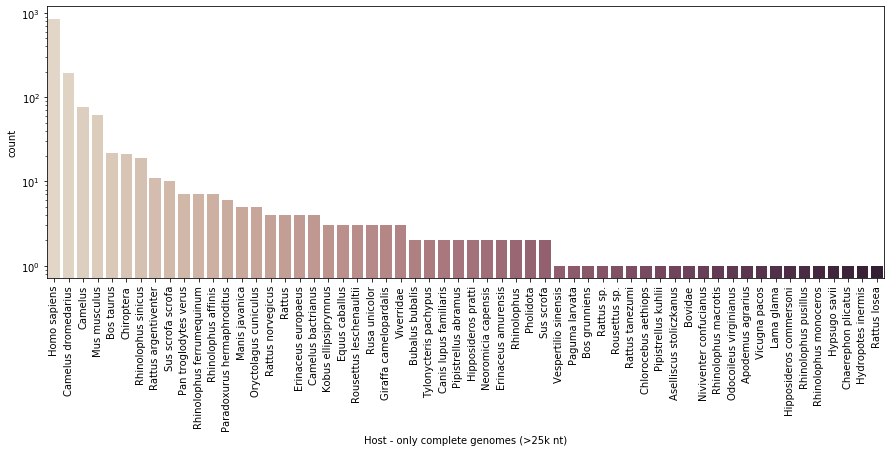

In [36]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
g1 = df.Length.hist(ax = ax[0], edgecolor="k")
g1.set_xlabel('Sequences length')
g2 = df.Length[df.Length > 25000].hist(bins=np.arange(29000,30001,100), edgecolor="k")
g2.set_xlabel('Complete genomes length')
plt.savefig("../plots/beta/EDA/lengths_beta.pdf")
#plt.savefig("lengths.png", dpi=600)

#>1000 complete genomes
#>5000 partial cds
#~1000 of something around 30k nt

## I'll group countries ignoring second-level data.
## Losing some information to provide better visualization
long_df = df[df.Length > 25000].copy()

##by country
fig, ax = plt.subplots(1, figsize=(15,5))
chart = sns.countplot(x="Country", palette="ch:.25", data=long_df, ax=ax,
                     order = long_df['Country'].value_counts().index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Country - only complete genomes (>25k nt)')
chart.set_yscale("log")

plt.savefig("../plots/beta/EDA/countries_beta.pdf")
plt.show()

plt.clf()
##by host
fig, ax = plt.subplots(1, figsize=(15,5))
chart = sns.countplot(x="Host", palette="ch:.25", data=long_df, ax=ax,
                     order = long_df['Host'].value_counts().index);
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_xlabel('Host - only complete genomes (>25k nt)')
chart.set_yscale("log")
plt.savefig("../plots/beta/EDA/host_beta.pdf")
plt.show()

#plt.savefig("countries.png", dpi=600)

In [31]:
df.Host.unique()

array(['Viverridae', 'Vicugna pacos', 'Vespertilio sinensis',
       'Tylonycteris pachypus', 'Triaenops persicus',
       'Tragelaphus spekii', 'Tragelaphus angasii',
       'Taphozous perforatus', 'Tadarida', 'Sus scrofa scrofa',
       'Sus scrofa', 'Scotophilus leucogaster', 'Scotophilus dinganii',
       'Rusa unicolor', 'Rupornis magnirostris', 'Rousettus sp.',
       'Rousettus leschenaultii', 'Rousettus amplexicaudatus',
       'Rousettus aegyptiacus', 'Rodentia', 'Rhinopoma hardwickii',
       'Rhinonicteris aurantia', 'Rhinolophus thomasi',
       'Rhinolophus sinicus', 'Rhinolophus rex', 'Rhinolophus pusillus',
       'Rhinolophus pearsonii', 'Rhinolophus monoceros',
       'Rhinolophus macrotis', 'Rhinolophus hipposideros',
       'Rhinolophus ferrumequinum', 'Rhinolophus euryale',
       'Rhinolophus creaghi', 'Rhinolophus cornutus',
       'Rhinolophus clivosus', 'Rhinolophus blasii',
       'Rhinolophus affinis', 'Rhinolophus', 'Rattus tanezumi',
       'Rattus sp.', 'Ra